In [26]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader

import os
from pycocotools.coco import COCO

In [27]:
dataDir='/home/awatras/Datasets/cocoapi'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [28]:
import torchvision.datasets as dset

ds = dset.CocoDetection(root = '/home/awatras/Datasets/cocoapi/images/val2017', annFile=annFile)

loading annotations into memory...
Done (t=5.73s)
creating index...
index created!


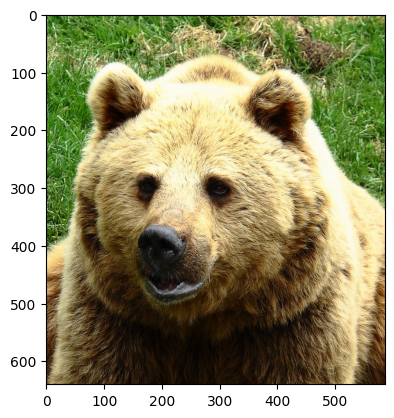

[1.43, 68.81, 584.57, 563.94]


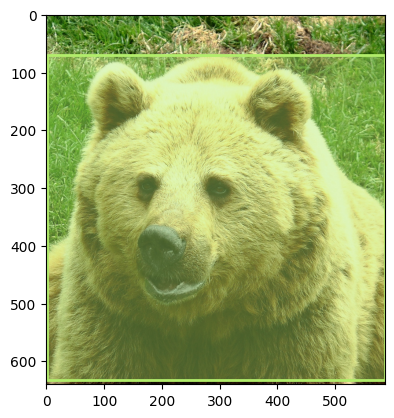

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

img = ds[1][0]
plt.imshow(img)
plt.show()

ann = ds[1][1][0]
polygons = []
color = []
c = (np.random.random((1, 3))*0.6+0.4).tolist()[0]
#for seg in ann['segmentation']:
#    poly = np.array(seg).reshape((int(len(seg)/2), 2))
#    polygons.append(Polygon(poly))
#    color.append(c)
print(ann['bbox'])
[bbox_x, bbox_y, bbox_w, bbox_h] = ann['bbox']
poly = [[bbox_x, bbox_y], [bbox_x, bbox_y+bbox_h], [bbox_x+bbox_w, bbox_y+bbox_h], [bbox_x+bbox_w, bbox_y]]
np_poly = np.array(poly).reshape((4,2))
polygons.append(Polygon(np_poly))
color.append(c)

plt.imshow(img)
ax = plt.gca()
p = PatchCollection(polygons, facecolor=color, linewidths=0, alpha=0.4)
ax.add_collection(p)
p = PatchCollection(polygons, facecolor='none', edgecolors=color, linewidths=2)
ax.add_collection(p)
plt.show()

[1.43, 68.81, 584.57, 563.94]
Crop Width: 473, Crop Height: 634
Crop X Min: 11, Crop Y Min: 1
[1.43, 68.81, 584.57, 563.94]
bbox: [0, 67.81, 473, 563.94]
<PIL.Image.Image image mode=RGB size=473x634 at 0x7FD7EE39C490>


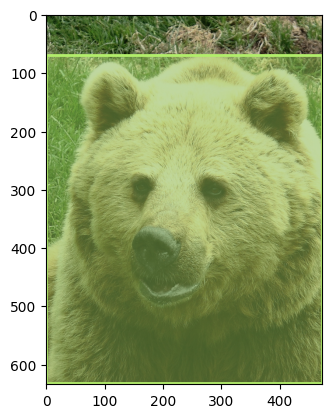

In [30]:
import torchvision
from torchvision.transforms import Resize, Compose, ToTensor
from utils.transforms import RandomCropWithBBox, RandomColorJitterWithBBox

tf = [RandomCropWithBBox(), RandomColorJitterWithBBox()]
bbox = ann['bbox'].copy()
print(bbox)

tf_img = img
tf_bbox = bbox
for t in tf:
    tf_img, tf_bbox = t(tf_img, bbox)
[bbox_x, bbox_y, bbox_w, bbox_h] = tf_bbox
poly = [[bbox_x, bbox_y], [bbox_x, bbox_y+bbox_h], [bbox_x+bbox_w, bbox_y+bbox_h], [bbox_x+bbox_w, bbox_y]]
np_poly = np.array(poly).reshape((4,2))

plt.imshow(tf_img)
ax = plt.gca()
p = PatchCollection([Polygon(np_poly)], facecolor=color, linewidths=0, alpha=0.4)
ax.add_collection(p)
p = PatchCollection([Polygon(np_poly)], facecolor='none', edgecolors=color, linewidths=2)
ax.add_collection(p)
plt.show()

In [31]:
ds[1][1]

[{'segmentation': [[37.31,
    373.02,
    57.4,
    216.61,
    67.44,
    159.21,
    77.49,
    113.29,
    91.84,
    86.03,
    123.41,
    84.59,
    162.15,
    96.07,
    215.25,
    86.03,
    261.17,
    70.24,
    285.56,
    68.81,
    337.22,
    68.81,
    411.84,
    93.2,
    454.89,
    107.55,
    496.5,
    255.35,
    513.72,
    262.53,
    552.47,
    292.66,
    586.0,
    324.23,
    586.0,
    381.63,
    586.0,
    449.08,
    586.0,
    453.38,
    578.3,
    616.97,
    518.03,
    621.27,
    444.84,
    624.14,
    340.09,
    625.58,
    136.32,
    625.58,
    1.43,
    632.75,
    7.17,
    555.26,
    5.74,
    414.64]],
  'area': 275709.8110500001,
  'iscrowd': 0,
  'image_id': 285,
  'bbox': [1.43, 68.81, 584.57, 563.94],
  'category_id': 23,
  'id': 587562}]

In [ ]:
from torchvision.transforms.v2 import Compose, RandomResizedCrop, ColorJitter, Resize
import torchvision.transforms.v2 as v2
from torchvision import tv_tensors
import numpy as np

tf_bbox = 0
img = ds[1][0]
bbox = tv_tensors.BoundingBoxes([x['bbox'] for x in ds[1][1]], format='XYWH', canvas_size = img.size)
label = ds[1][1][0]['category_id']
print(bbox)

tf = Compose([v2.ToImage(), RandomResizedCrop(size=(488,488))])

state = torch.get_rng_state()
tf_img, tf_bbox, = tf(img, bbox)

print(tf_bbox)
plt.imshow(tf_img)
plt.show()

BoundingBoxes([[  1.4300,  68.8100, 584.5700, 563.9400]], format=BoundingBoxFormat.XYWH, canvas_size=(586, 640))


ValueError: Found multiple HxW dimensions in the sample: '(586, 640)', '(640, 586)'